# Game of Thrones EDA

In [97]:
# Data Cleaning and wrangling
from pandas import DataFrame, read_csv
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")


# time module
import time

# regex module
import re

# import counter
from collections import Counter

In [98]:
def timeit(method):
    ''' To check the execution time
        Parameter
        ---------
        method: function
        Return
        ---------
        float number
    '''
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [112]:
@timeit
def load_csv(name):
    ''' loads the dataset
        Parameter:
        ----------
        method: string
        Return
        ----------
        dataframe
    '''
    try:
        filepath = "./" +name+ '.csv'
        if name == 'battles':
            return read_csv(filepath)
        elif name == 'character-deaths':
            return read_csv(filepath)
        elif name == 'character-predictions':
            return read_csv(filepath)
        else:
            pass
    except IOError:
        raise "File not Found 404"

battles = load_csv('battles')
character_deaths = load_csv('character-deaths')
character_predictions = load_csv('character-predictions')

'load_csv'  6.61 ms
'load_csv'  4.53 ms
'load_csv'  13.78 ms


In [100]:
battles.columns

Index([u'name', u'year', u'battle_number', u'attacker_king', u'defender_king',
       u'attacker_1', u'attacker_2', u'attacker_3', u'attacker_4',
       u'defender_1', u'defender_2', u'defender_3', u'defender_4',
       u'attacker_outcome', u'battle_type', u'major_death', u'major_capture',
       u'attacker_size', u'defender_size', u'attacker_commander',
       u'defender_commander', u'summer', u'location', u'region', u'note'],
      dtype='object')

In [116]:
# battles['attcker_number'] = []
@timeit
def new_features(dataframe1, dataframe2):
    dataframe1.loc[:, 'attacker_count'] = (4 - battles[['attacker_1','attacker_2', 'attacker_3', \
                                              'attacker_4']].isnull().sum(axis=1))
    dataframe1.loc[:, 'defender_count'] = (4 - battles[['defender_1','defender_2', 'defender_3', \
                                              'defender_4']].isnull().sum(axis=1))
    dataframe1.loc[:, 'att_comm_count'] = [len(x) if type(x) == list else np.nan for \
                                        x in battles.attacker_commander.str.split(',')]
    dataframe2.loc[:, 'no_of_books'] = character_predictions[[x for x in \
                                                                character_predictions.columns \
                                                            if x.startswith('book')]].sum(axis=1)
    
new_features(battles, character_predictions)

'new_features'  18.93 ms


In [102]:
battles.columns

Index([u'name', u'year', u'battle_number', u'attacker_king', u'defender_king',
       u'attacker_1', u'attacker_2', u'attacker_3', u'attacker_4',
       u'defender_1', u'defender_2', u'defender_3', u'defender_4',
       u'attacker_outcome', u'battle_type', u'major_death', u'major_capture',
       u'attacker_size', u'defender_size', u'attacker_commander',
       u'defender_commander', u'summer', u'location', u'region', u'note',
       u'attacker_count', u'defender_count', u'att_comm_count'],
      dtype='object')

In [103]:
character_predictions.columns

Index([u'S.No', u'actual', u'pred', u'alive', u'plod', u'name', u'title',
       u'male', u'culture', u'dateOfBirth', u'DateoFdeath', u'mother',
       u'father', u'heir', u'house', u'spouse', u'book1', u'book2', u'book3',
       u'book4', u'book5', u'isAliveMother', u'isAliveFather', u'isAliveHeir',
       u'isAliveSpouse', u'isMarried', u'isNoble', u'age', u'numDeadRelations',
       u'boolDeadRelations', u'isPopular', u'popularity', u'isAlive',
       u'no_of_books'],
      dtype='object')

In [105]:
battles.att_comm_count.value_counts()

1.0    15
2.0    13
3.0     5
6.0     2
5.0     2
Name: att_comm_count, dtype: int64

In [123]:
character_predictions.iloc[:, 16:21].head()

,book1,book2,book3,book4,book5
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,0,0,1,0


## Major Death/ Capture by year

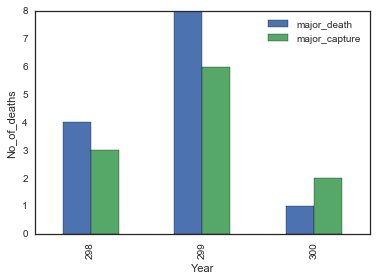

In [113]:
p = battles.groupby('year')[['major_death', 'major_capture']].sum().plot(kind='bar')
_ = p.set(xlabel='Year', ylabel='No_of_deaths')

## One Major house on attacking side

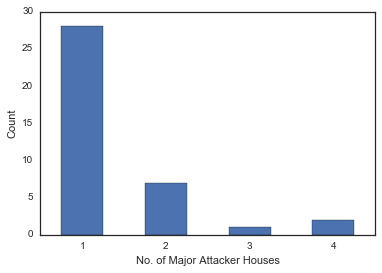

In [124]:
# c = list(tuple([set(x) for x in battles.attacker_commander.values() if len(set(x)) > 1]))
p = battles.attacker_count.value_counts().sort_index().plot.bar(rot = 0)
_ = p.set(xlabel = "No. of Major Attacker Houses", ylabel = "Count")

## Pair with most fought battle

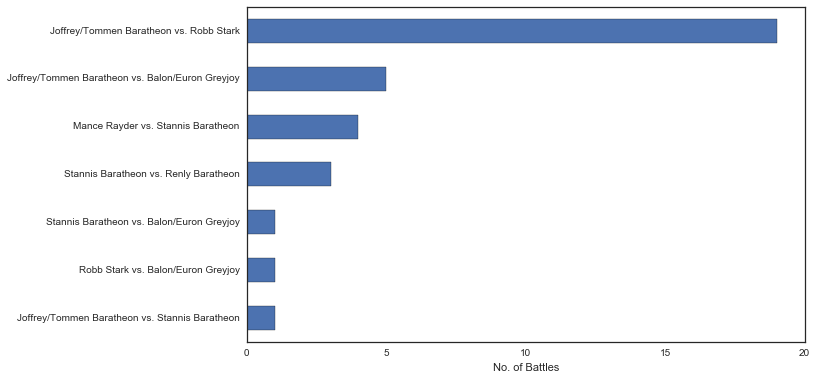

In [125]:
c = list(Counter([tuple(set(x)) for x in battles.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())
p = DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles"), p.legend("")

## Army commanders and their Kings

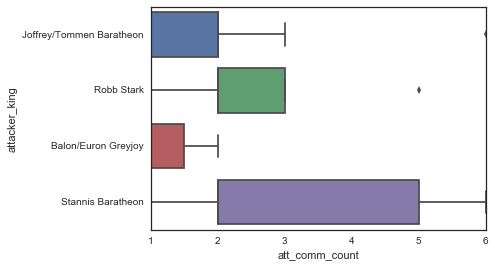

In [117]:
sns.boxplot(battles.att_comm_count, battles.attacker_king , data=battles)
